<a href="https://colab.research.google.com/github/LakshaySharma-2003/PROJECTS/blob/main/Credit_Card_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connecting to the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**header files and files from scikit learn**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

**Reading the database**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/credit_card_fraud_Dataset.csv")
df.head().style.background_gradient(cmap='Blues')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
df.describe().style.set_properties(**{'background-color': 'black',
                                      'color': 'white',
                                      'border-color': 'white'})

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,33.808550,6.359717,1.528653,0.929293,0.333333,0.131313,0.666667,0.080808
std,83.273773,20.112763,1.653407,0.257639,0.473804,0.339461,0.473804,0.273927
min,0.530985,0.035699,0.064768,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176720,0.297922,0.490631,1.000000,0.000000,0.000000,0.000000,0.000000
50%,11.411763,1.035118,1.070599,1.000000,0.000000,0.000000,1.000000,0.000000
75%,35.849861,3.460890,1.922429,1.000000,1.000000,0.000000,1.000000,0.000000
max,765.282559,175.989182,10.194359,1.000000,1.000000,1.000000,1.000000,1.000000


PRE-PROCESSING FOR DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              99 non-null     float64
 1   distance_from_last_transaction  99 non-null     float64
 2   ratio_to_median_purchase_price  99 non-null     float64
 3   repeat_retailer                 99 non-null     int64  
 4   used_chip                       99 non-null     int64  
 5   used_pin_number                 99 non-null     int64  
 6   online_order                    99 non-null     int64  
 7   fraud                           99 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 6.3 KB


In [7]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [8]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

PLOTING THE HEATMAP

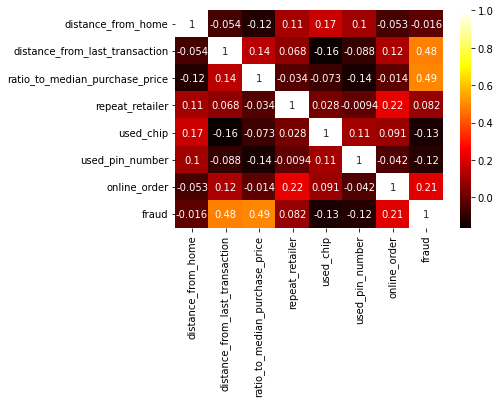

In [9]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="hot")

In [10]:
for i in df.columns[3:]:
  print(df[i].value_counts())

1    92
0     7
Name: repeat_retailer, dtype: int64
0    66
1    33
Name: used_chip, dtype: int64
0    86
1    13
Name: used_pin_number, dtype: int64
1    66
0    33
Name: online_order, dtype: int64
0    91
1     8
Name: fraud, dtype: int64


In [11]:
y=df["fraud"]
x=df.drop("fraud",axis=1)

---

**APPLYING LOGICAL REGRESSION**

TRAIN AND TEST THE DATA

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

BUILD THE CONFUSION MATRIX

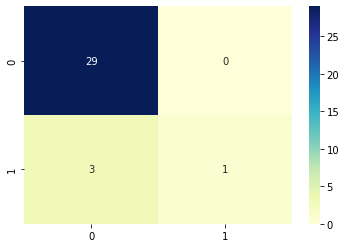

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.25      0.40         4

    accuracy                           0.91        33
   macro avg       0.95      0.62      0.68        33
weighted avg       0.92      0.91      0.88        33



CALCULATING THE PRECISION VALUE AND THE RECALL VALUE

In [15]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

1.0
0.25


---

**APPLYING RANDOM FOREST CLASSIFIER**

TRAING AND TESTING THE DATA

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion= "entropy",random_state= 42)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test)

In [17]:
print("Accuracy % of Random forest on test data: {}".format(score))

Accuracy % of Random forest on test data: 0.9090909090909091


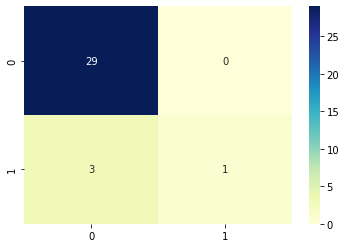

In [18]:
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,cmap="YlGnBu")

In [19]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.25      0.40         4

    accuracy                           0.91        33
   macro avg       0.95      0.62      0.68        33
weighted avg       0.92      0.91      0.88        33



In [20]:
print(precision_score(y_test,y_predicted))
print(recall_score(y_test,y_predicted))

1.0
0.25


---

CREATING THE FUNCTION FOR PRINTING THE CONFUSION MATRIX AND NORMALIZATION CAN BE APPLIED BY SETTING "normalize=True"

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[29  0]
 [ 3  1]]


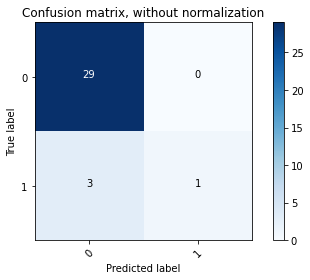

 
Normalized confusion matrix
[[1.   0.  ]
 [0.75 0.25]]


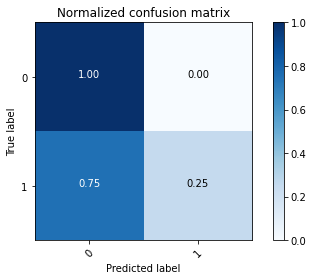

In [22]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_predicted), classes= [0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print(" ")
# With normalization
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_predicted), classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

---

Conclusion: logistics Regression is better then random forest as logistic regression performs better when the number of noise variables is less than or equal to the number of explanatory variables.